# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** CIFAR-10 object recognition

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [ ]:
from keras.datasets import cifar10
from matplotlib import pyplot
from matplotlib.pyplot import imread
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

### Loading the dataset

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i])
# show the plot
pyplot.show()

### Simple CNN for CIFAR-10

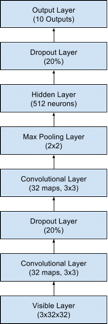

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
#model.add(Convolution2D(32, 3, 3, input_shape=(3, 32, 32), padding = "same" , activation= "relu" , W_constraint=maxnorm(3)))
model.add(Convolution2D(32, 3, 3, input_shape=(
    3, 32, 32), padding="same", activation="relu", ))
model.add(Dropout(0.2))

model.add(Convolution2D(32, 3, 3, activation="relu", padding="same",))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss="categorical_crossentropy",
              optimizer=sgd, metrics=["accuracy"])
print(model.summary())

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=epochs, batch_size=32, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
"""
I could not make it work!
"""

### Larger CNN for CIFAR-10

In [ ]:
"""
We have seen that a simple CNN performs poorly on this complex problem. In this section we look at scaling up the 
size and complexity of our model. Let’s design a deep version of the simple CNN above. We can introduce an additional
round of convolutions with many more feature maps. We will use the same pattern of Convolutional, Dropout, 
Convolutional and Max Pooling layers.

This pattern will be repeated 3 times with 32, 64, and 128 feature maps. The effect will be an increasing number 
of feature maps with a smaller and smaller size given the max pooling layers. Finally an additional and larger 
Dense layer will be used at the output end of the network in an attempt to better translate the large number 
feature maps to class values.
"""

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(
    3, 32, 32), activation="relu", padding="same"))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, activation="relu", padding="same"))
model.add(Dropout(0.2))
model.add(Convolution2D(64, 3, 3, activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 3, 3, activation="relu", padding="same"))
model.add(Dropout(0.2))
model.add(Convolution2D(128, 3, 3, activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation=relu, W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation=relu, W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation=softmax))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss=categorical_crossentropy, optimizer=sgd, metrics=[accuracy])
print(model.summary())

# Fit the model
model.fit(X_train, y_train, validation_data=(
    X_test, y_test), epochs=epochs, batch_size=64)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/how-to-load-and-visualize-standard-computer-vision-datasets-with-keras/

</font>
</div>